# Numerical Methods to Find Implied Volatility

In [14]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm

### Standard Normal CDF

In [3]:
#Helper functions to approximate standard normal CDF

#Trapezoid function
def g(q):
    return (1/np.sqrt(2*math.pi))*math.exp(-(q**2)*0.5)

def qsum(x, m):
    x = abs(x)
    dq = x/m
    g0 = g(0)
    sum1 = 0
    for i in range(1, m):
        sum1 += g(i*dq)
    gx = g(x)
    return (dq/2)*(g0 + 2*sum1 + gx)

def normal(x, m):
    if(x > 5):
        return 1
    sign = lambda x: math.copysign(1,x)
    return 0.5+sign(x)*qsum(x,m)

### Black Scholes Volatility Test

In [16]:
# Black Scholes Function
# Should return 0 if correct volatility is found

def f_sigma(S, r, T, E, C, sigma, m):
    d1 = (np.log(S/E)+r*T)/(sigma*np.sqrt(T))+(0.5*sigma*np.sqrt(T))
    d2 = (np.log(S/E)+r*T)/(sigma*np.sqrt(T))-(0.5*sigma*np.sqrt(T))
    return C-S*normal(d1, m) + normal(d2, m)*E*np.exp(-r*T)

### Bisection Method

In [17]:
def bisection_iv(S, r, T, E, C, m):
    # Check if inputs are valid
    if (C > S) or (C < (S - E*math.exp(-r*T))):
        print('Option price out of bounds')
        return None
    
    # Initial Points
    a0 = 10**(-6)
    b0 = 1
    
    # Alter interval to ensure solution is found
    fa = f_sigma(S, r, T, E, C, a0, m)
    fb = f_sigma(S, r, T, E, C, b0, m)
    if fa*fb > 0:
        if fa < 0:
            b0 = a0
            a0 = 0
        elif fb > 0:
            while(fb>0):
                a0 = b0
                b0 = 2*b0
                fb = f_sigma(S, r, T, E, C, b0, m) 
    
    print('bisection starting interval: [' + str(a0) + ',' + str(b0)+']')
    
    a = []
    b = []
    a.append(a0)
    b.append(b0)
    
    i = 0
    h = (a0+b0)/2
    fh = f_sigma(S, r, T, E, C, h, m)
    
    while(b[i]-a[i] > 10**(-6)):
        h = (a[i]+b[i])/2
        fa = f_sigma(S,r,T,E,C,a[i],m)
        fb = f_sigma(S,r,T,E,C,b[i],m)
        fh = f_sigma(S,r,T,E,C,h,m)
        if abs(fh) < 10**(-6):
            print('iterations: '+str(i))
            return h
        if fh*fb > 0:
            b.append(h)
            a.append(a[i])
        else:
            a.append(h)
            b.append(b[i])
        i+=1
        
    print('iterations: '+str(i))
    
    return h

### Newton's Method

In [6]:
# first derivative of the f function above
def f_prime(S, r, T, E, sigma):
    d1 = (np.log(S/E)+(r+(sigma**2)/2)*T)/math.sqrt((sigma**2)*T)
    return -S*g(abs(d1))*np.sqrt(T)

def newton_iv(S, r, T, E, C, m):
    # Check if inputs are valid
    if (C > S) or (C < (S - E*math.exp(-r*T))):
        print('Option price out of bounds')
        return None
    
    # This initial guess ensures a solution is found
    x0 = np.sqrt((2*abs(np.log(S/E)+r*T))/T)
    print('Newton starting point: ' + str(x0))
    
    i = 0
    x = []
    x.append(x0)
    while(True):
        fx = f_sigma(S,r,T,E,C,x[i],m)
        if abs(fx) < 10**(-6):
            print('iterations: ' + str(i))
            return x[i]
        fp = f_prime(S,r,T,E,x[i])
        x.append(x[i]-(fx/fp))
        i+=1
        
    return x[i]

### Results

In [7]:
calls = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
bis = []
newtons = []

for i in calls:
    print('call price: ' + str(i))
    bis.append(bisection_iv(0.75, 0.1, 5, 1, i, 100))
    newtons.append(newton_iv(0.75, 0.1, 5, 1, i, 100))
    print()

call price: 0.2
bisection starting interval: [1e-06,1]
iterations: 17
Newton starting point: 0.29142266730521776
iterations: 2

call price: 0.3
bisection starting interval: [1e-06,1]
iterations: 17
Newton starting point: 0.29142266730521776
iterations: 2

call price: 0.4
bisection starting interval: [1e-06,1]
iterations: 14
Newton starting point: 0.29142266730521776
iterations: 3

call price: 0.5
bisection starting interval: [1e-06,1]
iterations: 16
Newton starting point: 0.29142266730521776
iterations: 3

call price: 0.6
bisection starting interval: [1,2]
iterations: 15
Newton starting point: 0.29142266730521776
iterations: 4

call price: 0.7
bisection starting interval: [1,2]
iterations: 15
Newton starting point: 0.29142266730521776
iterations: 5



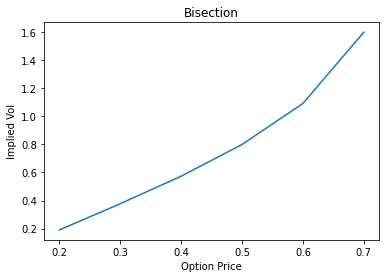

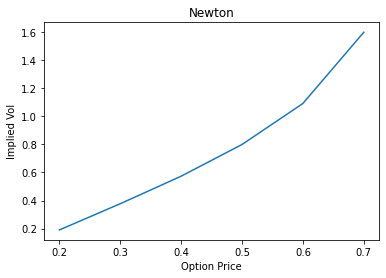

In [18]:
import matplotlib.pyplot as plt

plt.plot(calls, bis)
plt.xlabel('Option Price')
plt.ylabel('Implied Vol')
plt.title('Bisection')
plt.show()
plt.plot(calls, newtons)
plt.xlabel('Option Price')
plt.ylabel('Implied Vol')
plt.title('Newton')
plt.show()